## Lab 11.1

Remember to commit your lab notebook to your repo once you entered a lab quiz answer.

Spread-out over this lab and Assignment 4, and based on the explanations in class 11.1 create a nuclear network code notebook for the CN cycle. 

In this lab we will focus on a fixed temperature of $T=1.55\times10^{8}\mathrm{K}$ and a density of $\rho = 1 \mathrm{g/cm^3}$. 


## Activity 1
Name: `initial-abu-sum`, `test-term0`, `test-f_rhs`


1. Read initial abundance file `data/iniab1.4E-02As09.ppn`. Make sure you read in such a way that you also have a list of element name strings that is the 2nd column in the file. Enter the sum of the _molar_ fractions into quiz question `initial-abu-sum`.
2. A simple `get_rates` function returns the rates for `T9=0.155`: 
```Python
def get_rates():
    return [0.0012654285936930718, 0.003997856529541228, 0.0001810499744410427, 7.031858377405542]
```
Create a function `react_terms` that takes an abundance vector with all 6 abundances as input and returns the four terms that describe the production/reaction for each reaction, for example `rate[0]*Y[2]*Y[0]` for `C12(p,g)`. In order to get the rate vector the function would call `get_rates`. Test the equation and enter `log10` of the first element of what `react_terms` returns (`terms[0]`) into quiz `test-term0`.
4. Provide a function `f_rhs` for the RHS of the system of ODEs. The RHS for each of the 6 equations (one for each abundance) are made up of the terms provided by `react_terms`. Test the equation. Enter the in quiz question `test-f_rhs` the `log10` of the term representing the RHS of the equation  for $\frac{dX(^{12}C)}{dt}$.


In [3]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

numProton, element, sumProtonElec, massFrac = np.loadtxt("../Data/iniab1.4E-02As09.ppn", dtype='str', unpack=True)

# sum the mole fraction
Y = [float(massFrac[i])/float(sumProtonElec[i]) for i in range(len(massFrac))]
print(f"sum of mole fracion {sum(Y)}") # mole fraction <=> abundance

def get_rates():
    return [0.0012654285936930718, 0.003997856529541228, 0.0001810499744410427, 7.031858377405542]

def react_terms(Y, rate):
    res = []
    for i in range(4):
        cur = rate[i]*float(Y[0])*float(Y[i+2])
        res.append(cur)
    return res

rate = get_rates()
term = react_terms(Y, rate)
print(f"log10 of term[0]: {np.log10(term[0])}")

def f_rhs(Y, rate, term):
    rhs = [-term[0]-term[1]-term[2]-term[3],
            term[3],
            -term[0]+term[3], 
            term[0]-term[1],
            term[1]-term[2],
            term[2]-term[3],]
    return rhs

print(f"log10(dx(C12)/dt): {math.log10(f_rhs(Y, rate, term)[2])}")

sum of mole fracion 0.7832111935241673
log10 of term[0]: -6.727508741231021
log10(dx(C12)/dt): -6.37877467707733


## Activity 2

Names: `N14-time-scale`, `C13-412`



5. To get an idea of the time scale of the problem calculate $\tau_\mathrm{p} = \frac{1}{r_2 Y(p) \rho}$, which is the time scale of $^{14}N$ against capture of protons. Using the values as given this time is in units of seconds. Enter the time in quiz question `N14-time-scale` 
6. From the data in the initial abundance file create a list of element names with mass numbers for the species from the data in the initial abundance file, e.g. `c13` for the C isotope with mass $A=13$.
7. Using the utilities created in part 1. to 6. solve the network ODEs using `solve_ivp` for $t\in[0.,2000.]$ for $\rho$, $T$ specified above. **Important:** This set of differential equations is _stiff_ and you need to select a solver that can deal with stiff problems. Check the docstring! Also, make sure you require high enough precision so that the integration is numerically converged. Make a plot of the time evolution of all six species. Plot `log(X)` where `X` is the mass fraction of each species, versus time in seconds. All lines should be in the same plot, and each line needs to have different shape, colour and glyph. Place glyphs at appropriate distances so that they help distinguish the species but do not overcrowd the plot. Use the element labels created in 6. as legend labels.
8. Create a linear interpolation for the C13 mass fraction (you may use a library) as a function of time and evaluate that interpolation at $t = 412.1$. What is the C13 mass fraction at that time? Enter the `log10` of that abundance into quiz `C13-412`.

Time constant: 7720.782071364084


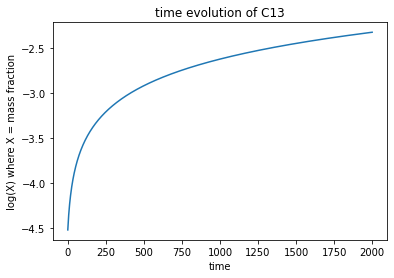

log(C13): -3.0008948319120887


In [11]:
# part 5
timeCons = 1/(rate[2]*Y[0])
print(f'Time constant: {timeCons}')

# solve ode
t = np.linspace(0, 2000, 1001)
func = lambda t, Y: f_rhs(Y, rate, term)
ode = solve_ivp(func, t_span=(0, 2000), y0=Y, method="Radau", t_eval=t)

plt.title('time evolution of C13')
plt.ylabel('log(X) where X = mass fraction')
plt.xlabel('time')
plt.plot(ode.t, np.log10(ode.y[3]*13))
plt.show()

res = np.interp(412.1, ode.t, ode.y[3]*13)
print(f'log(C13): {np.log10(res)}')

In [10]:
#solve_ivp?